<a href="https://colab.research.google.com/github/Ramyasree0707/Web-Scraping/blob/main/Naukri_Data_Science_Jobs_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: Navigating the Data Science Job Landscape

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an
ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting
pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most
coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data         science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process     hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information
   like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and
   organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss
   of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications,     and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that
   paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market
   intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

LinkedIn Jobs
Indeed
Naukri
Glassdoor
AngelList
🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters
to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this
exciting journey?

In [ ]:
#importing libraries
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
driver = webdriver.Chrome()
url = "https://www.naukri.com/data-science-jobs-in-india?k=data%20science&l=india"
driver.get(url)
time.sleep(3)
resp = driver.page_source
soup = BeautifulSoup(resp,"html.parser")
page_url = soup.find('div',{'class': 'styles_pages__v1rAK'})
a_tag = page_url.find_all('a')
links = []
jobs_list = []
for a in a_tag:
    next_url = a['href']
    next_url = "https://www.naukri.com"+next_url
    links.append(next_url)
def scrape_job_site(link):
  driver.get(link)
  time.sleep(3)
  resp = driver.page_source
  soup = BeautifulSoup(resp,"html.parser")
  jobs = soup.find_all('div', {'class' : 'srp-jobtuple-wrapper'})
  for job in jobs:
      job_dict = {}
      title = job.find('a',{'class': 'title'})
      company = job.find('a',{'class': 'comp-name mw-25'})
      rating = job.find('a',{'class': 'rating'})
      experience = job.find('span',{'class': 'expwdth'})
      salary = job.find('span',{'class': ''})
      location = job.find('span',{'class': 'locWdth'})
      description = job.find('span',{'class': 'job-desc ni-job-tuple-icon ni-job-tuple-icon-srp-description'})
      skills = job.find('ul',{'class': 'tags-gt'})
      job_dict["Title"] = title.text.strip() if title is not None else ''
      job_dict["Company"] = company.text.strip() if company is not None else ''
      job_dict['Location'] = location.text.strip().split(',')[0] if location is not None else ''
      job_dict["Rating"] = rating.text.strip() if rating is not None else ''
      job_dict["Experience"] = experience.text.strip() if experience is not None else ''
      job_dict["Salary"] = salary.text.strip() if salary is not None else ''
      job_dict["Description"] = description.text.strip() if description is not None else ''
      job_dict["Skills"] = ', '.join([skill.text.strip() for skill in skills.find_all('li')]) if skills is not None else ''
      jobs_list.append(job_dict)

for link in links:
    scrape_job_site(link)
driver.close()

In [ ]:
len(jobs_list)

200

In [ ]:
# Creating a dataframe of jobs_list
dsjobs_df = pd.DataFrame(jobs_list)

In [ ]:
dsjobs_df.head()

,Title,Company,Location,Rating,Experience,Salary,Description,Skills
0,Head - Data Science & Analytics,Exide,Kolkata,3.5,7-10 Yrs,Not disclosed,End-to-End Data Warehousing experience on SAP ...,"Data Science, Bi Tools, Ms Azure, Data Analyti..."
1,Data Science Engineer,Ninestars Information Technologies,Bangalore/Bengaluru,3.3,0-1 Yrs,3-8 Lacs PA,Must have: . Hands-on coding expertise / Solid...,"Algorithms, Data Structures, Artificial Intell..."
2,Python Developer - Data Science - Tiger analytics,Tiger Analytics,Hyderabad/Secunderabad,3.5,2-7 Yrs,Not disclosed,"Should be able to understand, test and debug e...","Data Science, Python, Azure, Pandas, Aws, Nump..."
3,"Assistant Manager, Data Science",Johnson and Johnson Kenvue,Bangalore/Bengaluru,4.0,7-9 Yrs,Not disclosed,Bachelor of Science or Bachelor of Engineering...,"Supply chain, Statistical programming, Data an..."
4,"Assistant Manager, Data Science",Johnson and Johnson Kenvue,Bangalore/Bengaluru,4.0,7-9 Yrs,Not disclosed,Bachelor of Science or Bachelor of Engineering...,"Supply chain, Data analysis, Data management, ..."


In [ ]:
# dataset rows and columns count
dsjobs_df.shape

(200, 8)

In [ ]:
dsjobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        200 non-null    object
 1   Company      200 non-null    object
 2   Location     200 non-null    object
 3   Rating       200 non-null    object
 4   Experience   200 non-null    object
 5   Salary       200 non-null    object
 6   Description  200 non-null    object
 7   Skills       200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB


In [ ]:
dsjobs_df.isnull().sum()

Title          0
Company        0
Location       0
Rating         0
Experience     0
Salary         0
Description    0
Skills         0
dtype: int64

In [ ]:
#Checking for duplicates
len(dsjobs_df[dsjobs_df.duplicated()])

0

# Data Wrangling

In [ ]:
#Converting rating column to numeric type
dsjobs_df['Rating'] = pd.to_numeric(dsjobs_df['Rating'])

In [ ]:
dsjobs_df['Title'].value_counts()

Title
Data Science Manager                                                      11
Data Science Professional                                                  8
Data Science Engineer                                                      7
Data Science Analyst                                                       6
Data Science Trainer                                                       6
                                                                          ..
AI ML Developer Data Science - Python\tJob Opportunity with Hexaware!!     1
Data Science and Analytics Manager                                         1
Senior Analyst Data Science                                                1
Data Analyst - Equity Data Science                                         1
Digital Marketing & Data Science Analyst with leading MNC                  1
Name: count, Length: 135, dtype: int64

In [ ]:
top_jobs = dsjobs_df['Title'].value_counts().head(13)
top_jobs

Title
Data Science Manager                  11
Data Science Professional              8
Data Science Engineer                  7
Data Science Analyst                   6
Data Science Trainer                   6
Data Scientist                         5
Senior Data Scientist                  5
Data Science Lead                      5
Data Science Intern                    4
Senior Data Analyst                    3
Manager - Data Science - Analytics     3
Assistant Manager, Data Science        3
Data Analyst                           3
Name: count, dtype: int64

In [ ]:
Top_jobs = list(top_jobs.index)

In [ ]:
Top_jobs_info = dsjobs_df[(dsjobs_df['Title'].isin(Top_jobs)) & (dsjobs_df['Salary']!='Not disclosed')]

In [ ]:
Top_jobs_info[['Title','Experience','Salary','Skills']]

,Title,Experience,Salary,Skills
1,Data Science Engineer,0-1 Yrs,3-8 Lacs PA,"Algorithms, Data Structures, Artificial Intell..."
54,Data Science Lead,8-13 Yrs,25-35 Lacs PA,"Natural Language Processing, Data Science, Tim..."
60,Data Science Trainer,,4.75-9.75 Lacs PA,"Data Science, Matplotlib, Data Engineering, Ar..."
75,Data Science Analyst,4-9 Yrs,20-25 Lacs PA,"python, Data Science, Predictive Modeling, Sof..."
76,Data Science Intern,,No fixed duration,
108,Data Science Intern,,No fixed duration,
154,Data Science Intern,,2 months duration,
167,Data Scientist,2-5 Yrs,6.5-10 Lacs PA,"Data Analytics, Data Science, Predictive Analy..."
173,Data Science Trainer,3-4 Yrs,3.75-6 Lacs PA,"Machine Learning, Deep Learning, SQL, R, Pytho..."
174,Data Scientist,2-4 Yrs,5-9.5 Lacs PA,"Data Science, python, Data Analytics, Machine ..."


In [ ]:
# function to convert experience to numeric
def convert_experience(experience):
    if experience:
        experience_values = [int(value) for value in experience.replace('Yrs','').split('-')]
        return sum(experience_values) / len(experience_values)
    else:
        return None


In [ ]:
dsjobs_df['Experience'] = dsjobs_df['Experience'].apply(convert_experience)

In [ ]:
# function to convert salary to numeric
def convert_salary(salary):
    if salary:
        salary_values = [float(value) for value in salary.replace('Lacs PA', '').split('-')]
        return sum(salary_values) / len(salary_values)
    else:
        return None

In [ ]:
# repacing not disclosed salary to 0
dsjobs_df['Salary'].replace({'Not disclosed':0.0},inplace=True)

In [ ]:
# dropping this row as there are many missing values in this row
dsjobs_df[dsjobs_df['Salary']=='3 months duration']

,Title,Company,Location,Rating,Experience,Salary,Description,Skills
52,Intern - Data Science,,Thane,NaN,NaN,3 months duration,,


In [ ]:
# removing all rows where salary is not in amount
dsjobs_df = dsjobs_df.drop(dsjobs_df[dsjobs_df['Salary'].isin(['3 months duration','6 months duration','2 months duration','No fixed duration'])].index,axis=0)

In [ ]:
dsjobs_df['Salary'] = dsjobs_df['Salary'].apply(convert_salary)

In [ ]:
dsjobs_df = dsjobs_df.rename(columns={'Salary': 'Salary in Lacs'})

In [ ]:
dsjobs_df.dtypes

Title              object
Company            object
Location           object
Rating            float64
Experience        float64
Salary in Lacs    float64
Description        object
Skills             object
dtype: object

In [ ]:
dsjobs_df['Rating'] = dsjobs_df['Rating'].fillna(0)

In [ ]:
dsjobs_df['Experience'] = dsjobs_df['Experience'].fillna(dsjobs_df['Experience'].mean())

In [ ]:
dsjobs_df.shape

(193, 8)

In [ ]:
dsjobs_df.isnull().sum()

Title               0
Company             0
Location            0
Rating              0
Experience          0
Salary in Lacs    171
Description         0
Skills              0
dtype: int64

I have not handled null values in Salary column as there are more than 60% of null values in that column.

# Data visualization

Chart-1

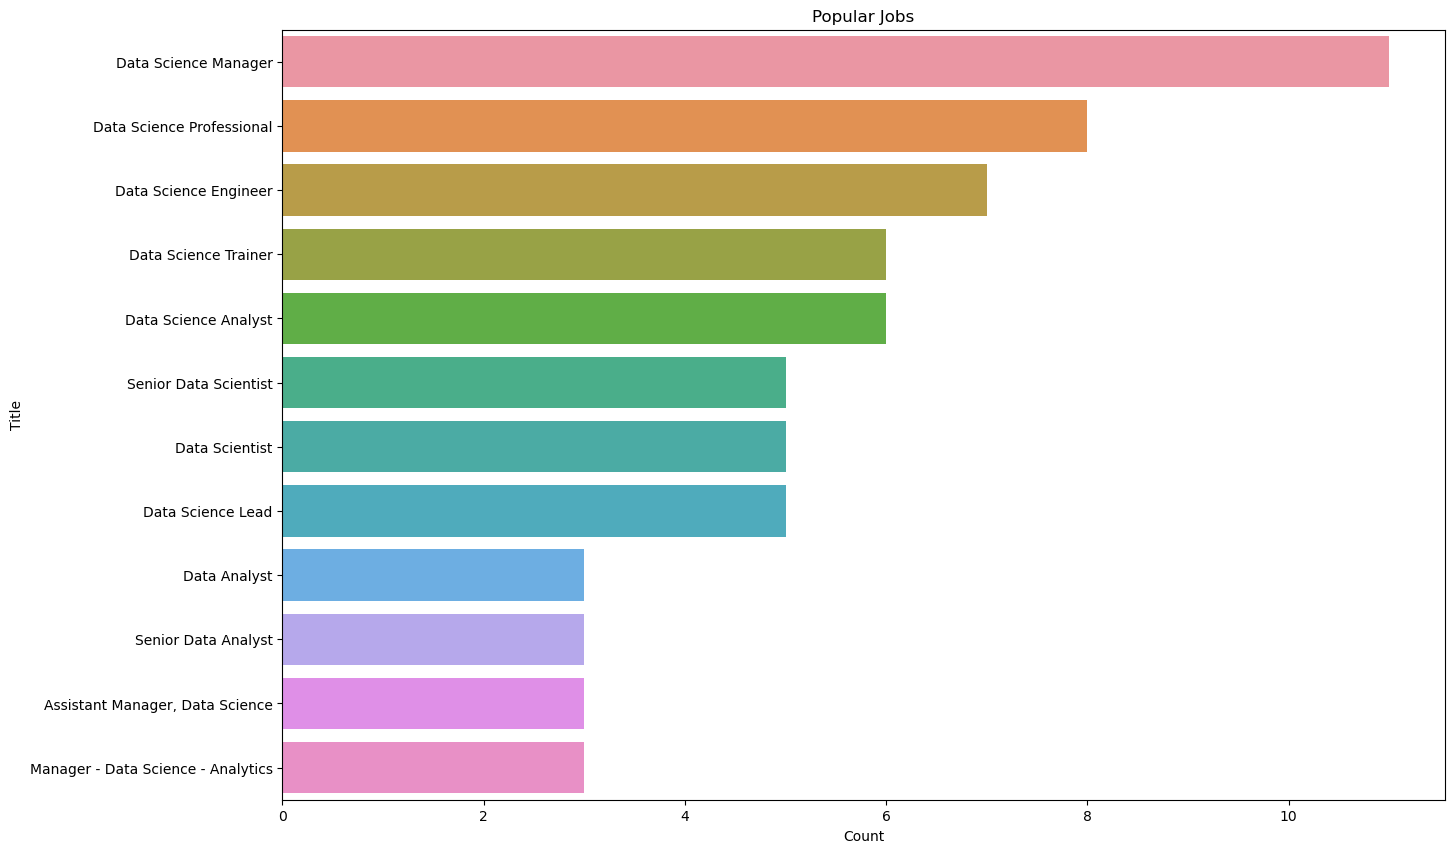

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(y=top_jobs.index,x=top_jobs.values,orient='h')
plt.xlabel('Count')
plt.title('Popular Jobs')
plt.show()

From the above barplot we can see that, Data science Manager,Data science professional,Data science Engineer,Data science
analyst,Senior Data Scientist, Data Scientist, Data Science Lead and Data Analyst are popular data science jobs.

Chart-2

In [ ]:
jobs = dsjobs_df[(dsjobs_df['Title'].isin(Top_jobs)) & pd.notna(dsjobs_df['Salary in Lacs'])]

In [ ]:
jobs_sal = jobs.groupby('Title')['Salary in Lacs'].mean().sort_values(ascending=False)

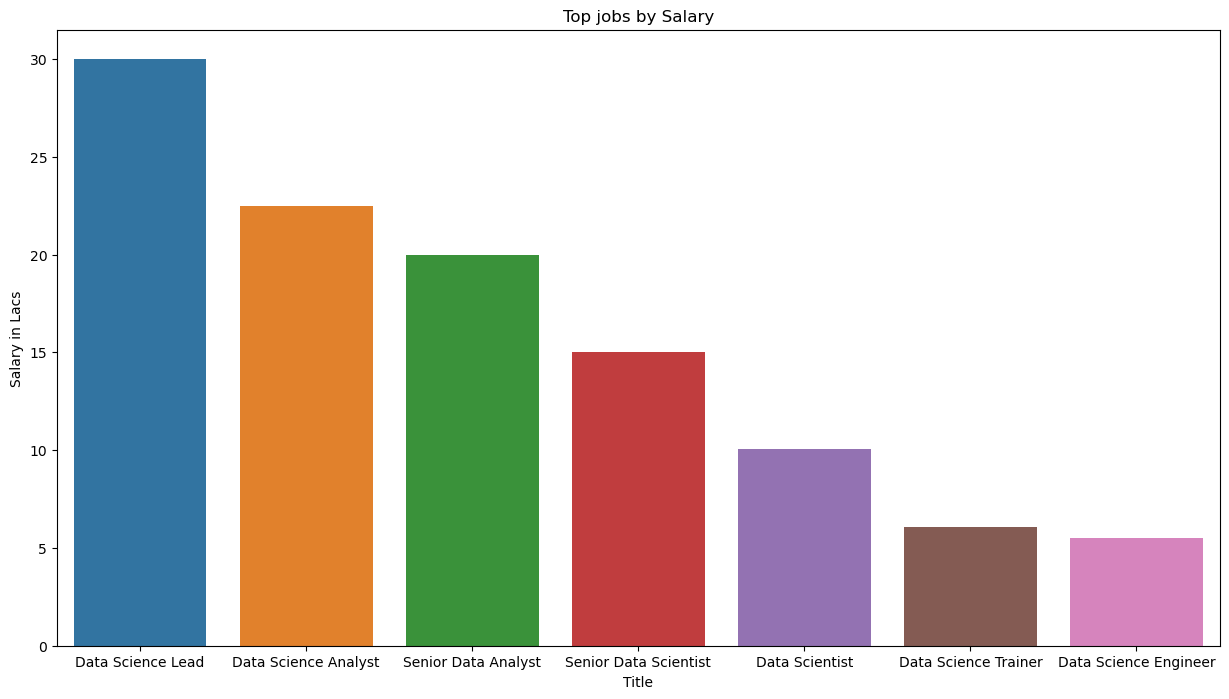

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=jobs_sal.index,y=jobs_sal.values)
plt.ylabel('Salary in Lacs')
plt.title('Top jobs by Salary')
plt.show()

From the above chart we can see that, Data Science Lead, Data Science Analyst, Senior Data Analyst, Senior Data scientist
and Data scientist are having highest salaries.

Chart-3

In [ ]:
pop_dsjobs = dsjobs_df[dsjobs_df['Title'].isin(Top_jobs)]

In [ ]:
jobs_exp = pop_dsjobs.groupby('Title')['Experience'].mean().sort_values(ascending=False)

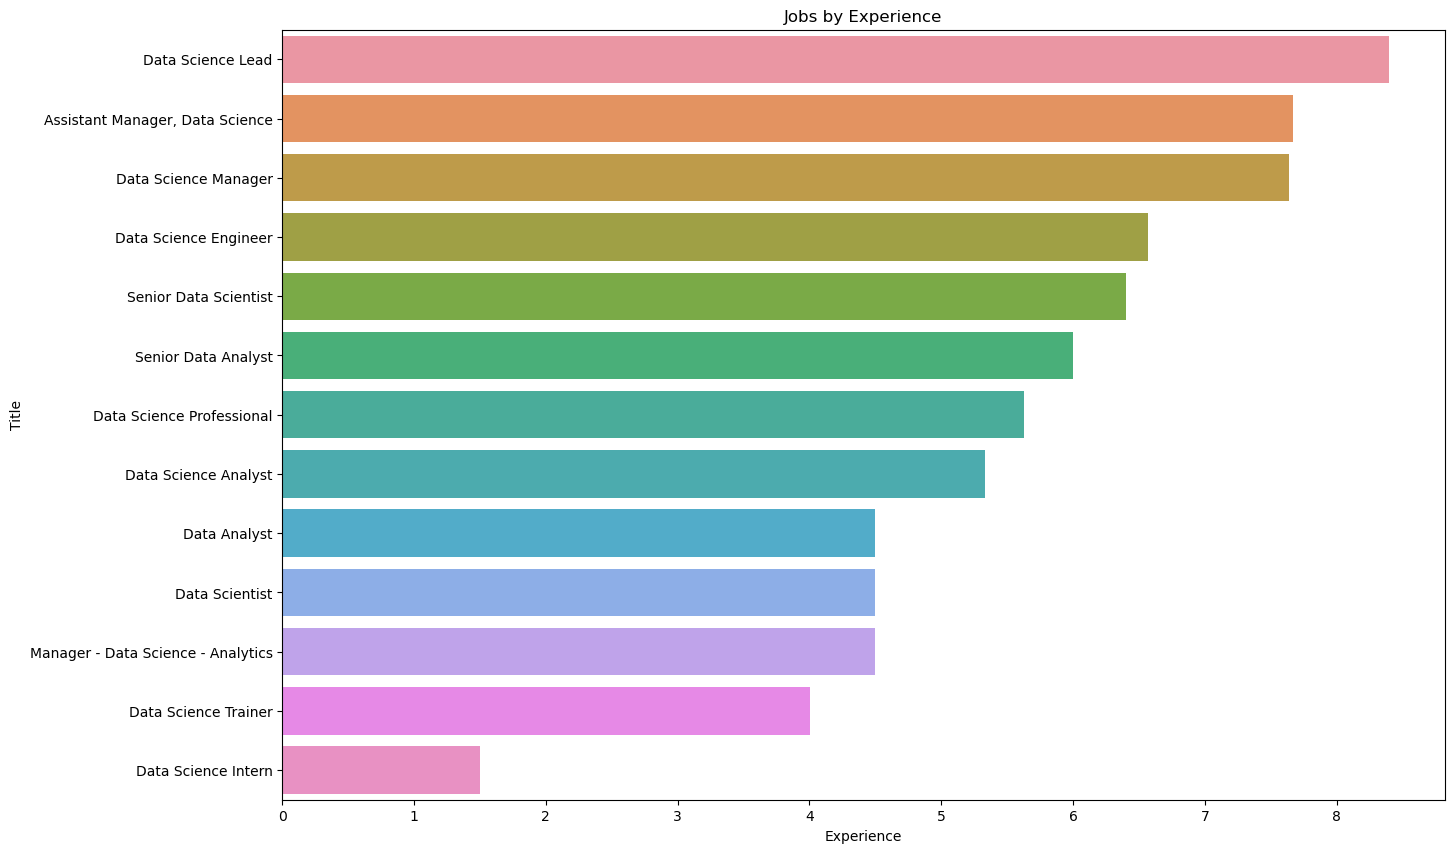

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=jobs_exp.values,y=jobs_exp.index,errorbar=None,orient='h')
plt.xlabel('Experience')
plt.title('Jobs by Experience')
plt.show()

The above horizontal bar chart says that, most of the companies are expecting average of 8yrs of experience for Data science
Lead, 6.5yrs for data engineer and senior data scientist, and 4.5yrs of experience for Data analyst and Data scientist.

Chart-4

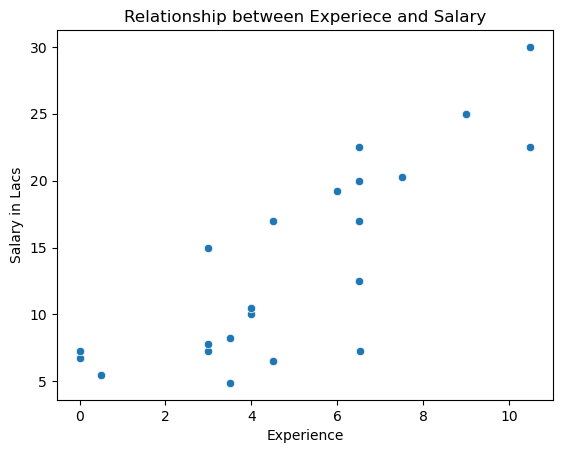

In [ ]:
sns.scatterplot(data=dsjobs_df,x='Experience',y='Salary in Lacs')
plt.title("Relationship between Experiece and Salary")
plt.show()

From the above scatter plot we can see that, there is a positive correlation between Experience and Salary.This means as
Experience increases Salary increases.

Chart-5

In [ ]:
locations = dsjobs_df.Location.value_counts().head(10)

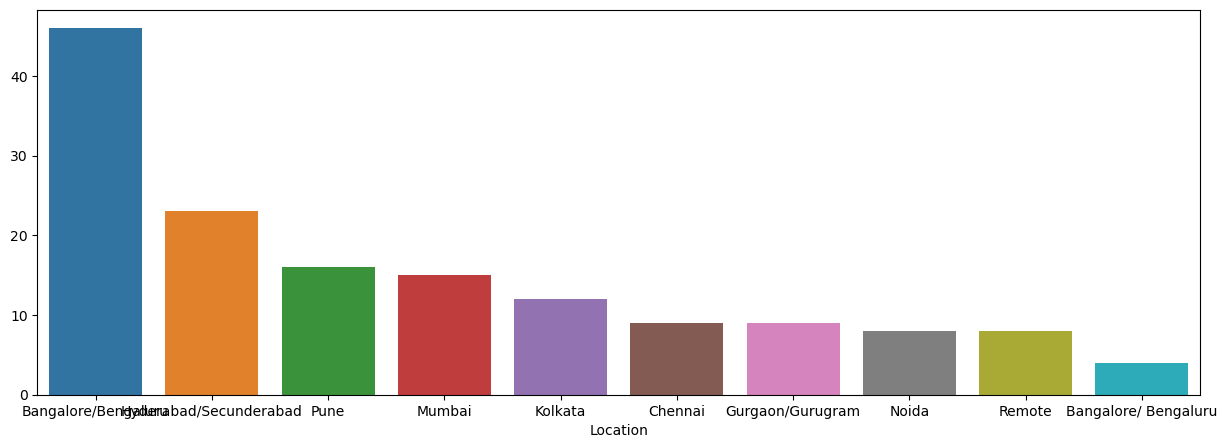

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=locations.index,y=locations.values)
plt.show()

The above chart shows that, most of the data science jobs are in Bangalore followed by Hyderabad,Pune and Mumbai.

Chart-6

In [ ]:
top_locations = dsjobs_df[(dsjobs_df['Location'].isin(locations.index)) & pd.notna(dsjobs_df['Salary in Lacs'])]


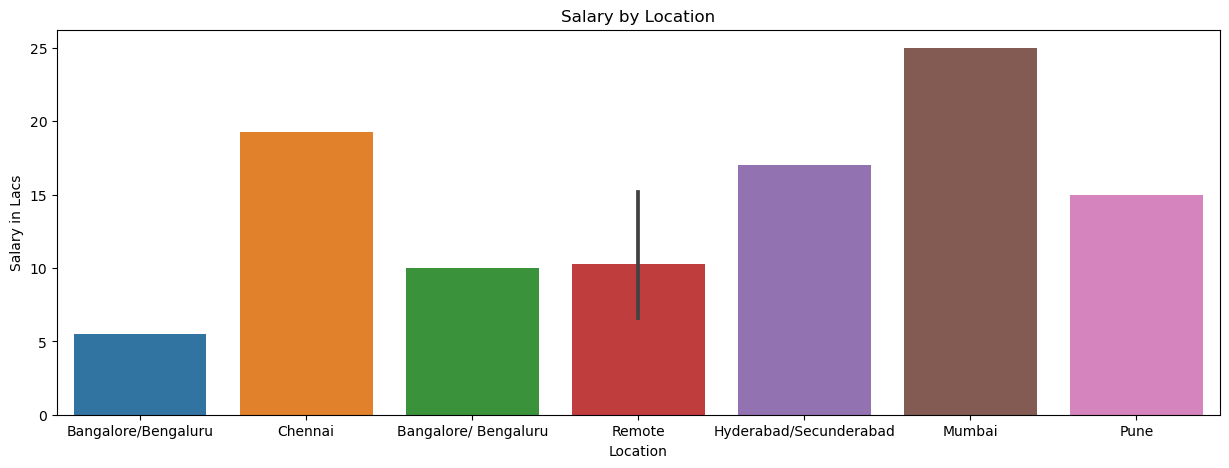

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_locations,x='Location',y='Salary in Lacs')
plt.title('Salary by Location')
plt.show()

The above chart shows that, highest salaries are paid in Mumbai followed by Chennai,Bangalore ad Hyderabad.

Chart-7

In [ ]:
locations_exp = dsjobs_df[dsjobs_df['Location'].isin(locations.index)]

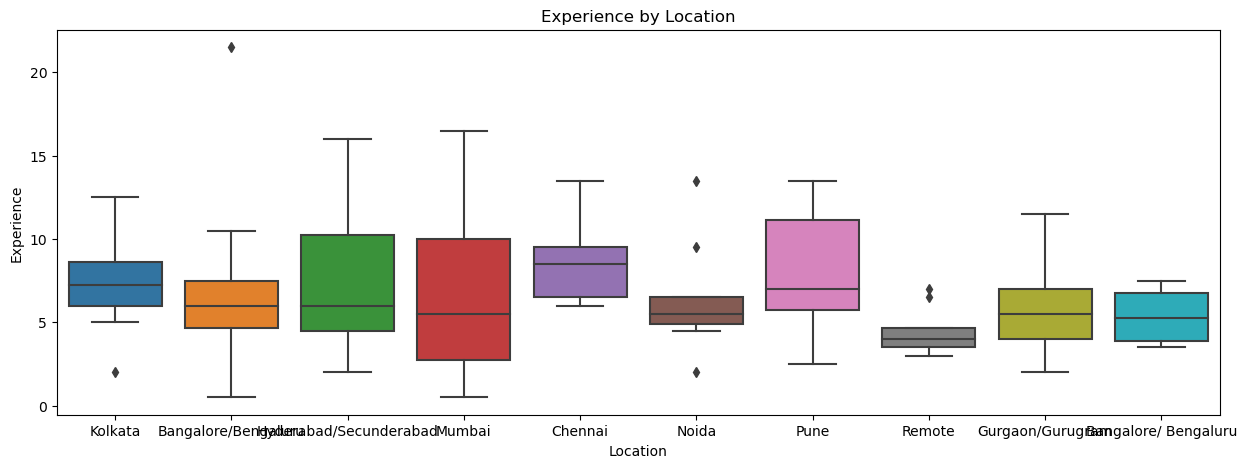

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=locations_exp,x='Location',y='Experience')
plt.title("Experience by Location")
plt.show()

From the above boxplot we can see that, Experiences are in between 5-10yrs. In Hyderabad experiences are asked in between
5-10yrs, in Mumbai 3-10yrs and in Bangalore 5-8yrs.

Chart-8

In [ ]:
# Ratings by company
dsjobs_df.groupby('Company')['Rating'].mean().sort_values(ascending=False)

Company
Targeticon Digital Services Pvt. Ltd.    5.0
Meru Capitals                            5.0
Prime Search                             5.0
Super Scholar                            5.0
Micron Software                          5.0
                                        ... 
Blend360 India                           2.9
Themathcompany                           2.7
Consilium Software                       2.5
QiO                                      1.0
                                         0.0
Name: Rating, Length: 113, dtype: float64

Chart-9

In [ ]:
#Skills by job
jobs[['Title','Skills']]

,Title,Skills
1,Data Science Engineer,"Algorithms, Data Structures, Artificial Intell..."
54,Data Science Lead,"Natural Language Processing, Data Science, Tim..."
60,Data Science Trainer,"Data Science, Matplotlib, Data Engineering, Ar..."
75,Data Science Analyst,"python, Data Science, Predictive Modeling, Sof..."
167,Data Scientist,"Data Analytics, Data Science, Predictive Analy..."
173,Data Science Trainer,"Machine Learning, Deep Learning, SQL, R, Pytho..."
174,Data Scientist,"Data Science, python, Data Analytics, Machine ..."
178,Data Scientist,"Data Science, Machine Learning, Python, Scienc..."
182,Senior Data Analyst,"Tableau, ETL Tool, SQL, data analytics, Shell ..."
194,Data Scientist,"Data Analytics, Data Science, Predictive Analy..."


In [ ]:
dsjobs_df[dsjobs_df['Title']=='Data Science Lead']['Skills']

41     Data Science, Artificial Intelligence, Machine...
54     Natural Language Processing, Data Science, Tim...
85     Machine Learning, Deep Learning, Data Science,...
134    IT services, data science, Web application, Ma...
138    Water treatment, C++, data science, Analytical...
Name: Skills, dtype: object

In [ ]:
dsjobs_df[dsjobs_df['Title']=='Data Science Engineer']['Skills']

1      Algorithms, Data Structures, Artificial Intell...
16     llms, RDBMS, aws, Python, cloud, Large Languag...
87     NoSQL, Manager Quality Assurance, GCP, Machine...
112    Data Science, Machine Learning, Python, Artifi...
117    Supply chain management, Networking, data scie...
119    data science, Data modeling, Artificial Intell...
169    Data Science, langchain, plotly, Python, Data,...
Name: Skills, dtype: object

In [ ]:
dsjobs_df[dsjobs_df['Title']=='Data Analyst']['Skills']

155    data science, Focus, Consulting, IT infrastruc...
156    data science, Focus, Consulting, IT infrastruc...
189    Decision Tree, Regression, Data Analytics, Ran...
Name: Skills, dtype: object

# Conclusion

 1. Data science Manager,Data science professional,Data science Engineer,Data science analyst,Senior Data Scientist,
    Data Scientist, Data Science Lead and Data Analyst are popular data science jobs.
    
 2. Data Science Lead is given highest salary of 30 LPA, followed by Data science Analyst with 22 LPA. Senior Data Analyst has
    salary of 20 LPA,Senior Data Scientist has salary of 15 LPA and Data Scientist has 10 LPA.
    
 3. Most of the companies are expecting average of 8yrs of experience for Data science Lead,6.5yrs for data engineer and
    Senior Data Scientist, and 4.5yrs of experience for Data analyst and Data scientist.
    
 4. As the Experience increases Salary increases.

 5. Most of the data science jobs are in Bangalore followed by Hyderabad,Pune and Mumbai.

 6. Mumbai has highest salaries followed by Hyderabad,Chennai and Bangalore.

 7. Skills required for Data Scientist are Data science, python, Machine learning, Data analytics and predictive analysis.

 8. Skills reqired for Senior Data Analyst are Tableau, ETL Tool, SQL, data analytics, Shell Programming.

 9. Skills required for Senior Data Scientist are Big Data Technologies,Machine Learning, Python, Data Science, MySQL, Big         Data.

 10. Skills required for Data Engineer are Algorithms, Data structures, Artificial intelligence, llms, RDBMS, Python, Cloud.

 11. Skills required for Data Science Lead are Natural Language Processing, Data Science,Machine Learning and Deep Learning.

 12. Skills required for Data Analyst are Data Science, Data Analytics.